In [1]:
from bs4 import BeautifulSoup 
import requests

In [2]:
url = 'https://results.eci.gov.in/AcResultGenJune2024/partywiseresult-S18.htm'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

NameError: name 'requests' is not defined

In [5]:
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link crossorigin="" href="css/leaflet.css" integrity="sha256-kLaT2GOSpHechhsozzB+flnD+zUyjE2LlfWPgU04xyI=" rel="stylesheet"/>
<script crossorigin="" integrity="sha256-WBkoXOwTeyKclOHuWtc+i2uENFpDZ9YPdf5Hf+D7

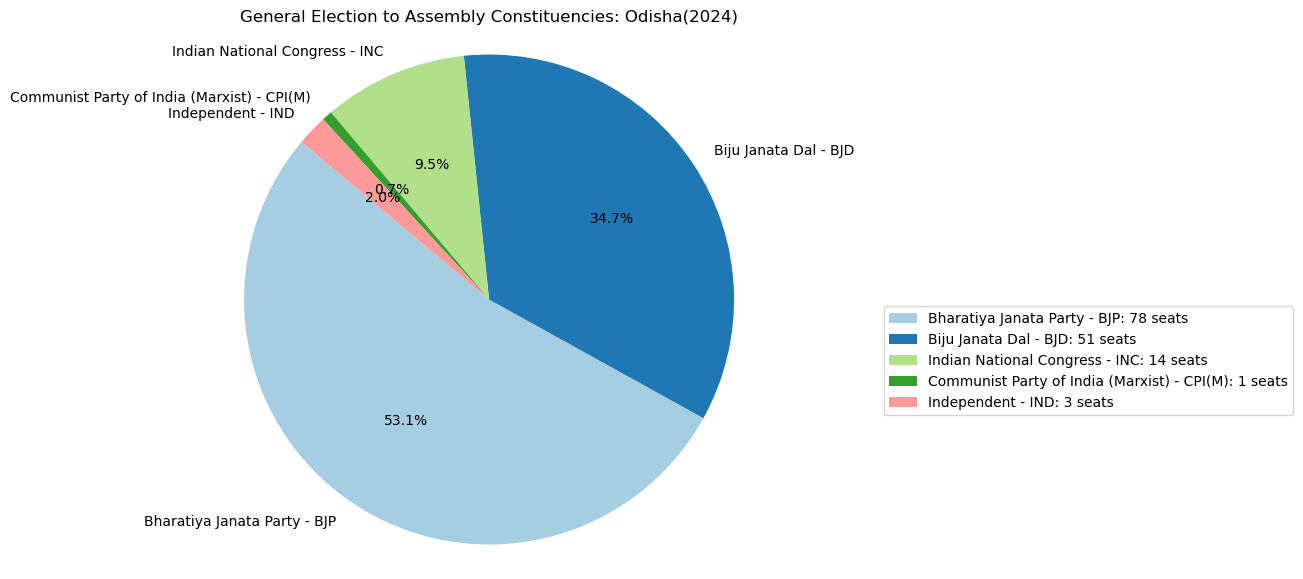

In [4]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


html_content = """
<div class="rslt-table teble-responsive">
    <table class="table">
        <thead>
            <tr>
                <th style="text-align: left;">Party</th>
                <th style="text-align:right">Won</th>
                <th style="text-align:right">Leading</th>
                <th style="text-align:right">Total</th>
            </tr>
        </thead>
        <tbody>
            <tr class="tr"> 
                <td style="text-align:left">Bharatiya Janata Party - BJP</td>
                <td style="text-align:right"><a href="partywisewinresult-369S18.htm">78</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">78</td>
            </tr>
            <tr class="tr"> 
                <td style="text-align:left">Biju Janata Dal - BJD</td>
                <td style="text-align:right"><a href="partywisewinresult-350S18.htm">51</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">51</td>
            </tr>
            <tr class="tr"> 
                <td style="text-align:left">Indian National Congress - INC</td>
                <td style="text-align:right"><a href="partywisewinresult-742S18.htm">14</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">14</td>
            </tr>
            <tr class="tr"> 
                <td style="text-align:left">Communist Party of India (Marxist) - CPI(M)</td>
                <td style="text-align:right"><a href="partywisewinresult-547S18.htm">1</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">1</td>
            </tr>
            <tr class="tr"> 
                <td style="text-align:left">Independent - IND</td>
                <td style="text-align:right"><a href="partywisewinresult-743S18.htm">3</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">3</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <th>Total</th>
                <th style="text-align:right">147</th>
                <th style="text-align:right">0</th>
                <th style="text-align:right">147</th>
            </tr>
        </tfoot>
    </table>
</div>
"""

soup = BeautifulSoup(html_content, 'html.parser')

# Initialize lists to store data
parties = []
seats_won = []

# Locate the table containing the election results
table = soup.find('div', class_='rslt-table teble-responsive').find('table')
rows = table.find('tbody').find_all('tr')

for row in rows:
    columns = row.find_all('td')
    if len(columns) >= 3:  # Ensure there are enough columns
        party = columns[0].get_text(strip=True)
        won = int(columns[1].get_text(strip=True))
        
        parties.append(party)
        seats_won.append(won)

# Step 2: Visualize Data Using Matplotlib
# You can adjust the colors if needed
colors = plt.cm.Paired(range(len(parties)))

plt.figure(figsize=(10, 7))
plt.pie(seats_won, labels=parties, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('General Election to Assembly Constituencies: Odisha(2024)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with the number of seats won
legend_labels = [f'{party}: {seats} seats' for party, seats in zip(parties, seats_won)]
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()
